In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
df = pd.read_csv('/content/Sales_Data.csv')

In [58]:
df.isnull().sum()

Month    0
Qty      2
dtype: int64

In [59]:
df['Qty'] = df['Qty'].fillna(df['Qty'].median())
df.head(3)

,Month,Qty
0,Jan-21,25.0
1,Feb-21,25.0
2,Mar-21,33.0


MA (equal weights to all lag values, all lag values are equally significant)

In [60]:
df['mavg3'] = np.round(df.Qty.rolling(window = 3).mean().shift(1),0) 

# window = 3 -> means 3 days rolling period
# shift(1) -> means 3 days window to be considered from the previous day (t-1)  

In [61]:
df

,Month,Qty,mavg3
0,Jan-21,25.0,NaN
1,Feb-21,25.0,NaN
2,Mar-21,33.0,NaN
3,Apr-21,25.0,28.0
4,May-21,20.0,28.0
5,Jun-21,30.0,26.0
6,Jul-21,53.0,25.0
7,Aug-21,40.0,34.0
8,Sep-21,30.0,41.0
9,Oct-21,53.0,41.0


In [62]:
# defining a function get_mape to calculate MAPE (Mean Absolute Percentage Error)
def get_mape(actual, pred):
  return np.round(np.mean(np.abs(100*(actual-pred)/actual)),2)

In [63]:
mape = get_mape(df.Qty[3:],df.mavg3[3:]) # calculating MAPE for MA method
mape

30.38

In [64]:
rmse = np.round(np.sqrt(mean_squared_error(df.Qty[3:],df.mavg3[3:])),2) # calculating RMSE (Root Mean Squared Error) for MA method
rmse

12.83

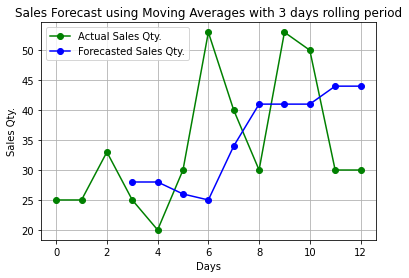

<Figure size 1080x720 with 0 Axes>

In [75]:
plt.plot(df.Qty, label = 'Actual Sales Qty.', marker = 'o', color = 'green')
plt.plot(df.mavg3, label = 'Forecasted Sales Qty.', marker = 'o', color = 'blue')
plt.title('Sales Forecast using Moving Averages with 3 days rolling period')
plt.xlabel('Days')
plt.ylabel('Sales Qty.')
plt.legend()
plt.grid(True)
plt.figure(figsize=(15,10))
plt.show()